In [212]:
# ALL THE REQUIRED LIBRARIES
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt


#KERAS
from PIL import Image 
import keras,shutil,keras_preprocessing,requests,math,glob, datetime
import tensorflow as tf
from keras import layers
from keras.models import Sequential, Model 
from keras.layers import Lambda, Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, SpatialDropout2D, GlobalAveragePooling2D 
from keras.callbacks import EarlyStopping
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocessor
from keras.applications.xception import Xception, preprocess_input as xception_preprocessor
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as inc_resnet_preprocessor
from keras.applications.nasnet import NASNetLarge, preprocess_input as nasnet_preprocessor

# SKLEARN
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_files
from io import BytesIO
import seaborn as sns
import xml.etree.ElementTree as ET
from pathlib import Path
%load_ext tensorboard
shutil.rmtree('./logs', ignore_errors=True)

#SKIMAGE
from skimage import data, exposure, img_as_float
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage import io
from skimage import filters


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [214]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
dog_images = glob.glob("/Users/angel/Data_Mining/Images/*/*")
annotations = glob.glob("/Users/angel/Data_Mining/Annotation/*/*")


In [216]:
def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
    return bbox

In [218]:
def get_image(annot):
    img_path = '/Users/angel/Data_Mining/Images/'
    file = annot.split('/')
    img_filename = img_path + file[-2]+'/'+file[-1]
   
    return img_filename

In [220]:
for i in range(len(dog_images)):
    print(len(dog_images))
    print(annotations[i])
    bbox = get_bounding_boxes(annotations[i])
    dog = get_image(dog_images[i])
    print(dog)
    print(bbox)

    im = Image.open(dog)
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((331,331), Image.Resampling.LANCZOS)
        new_path = dog.replace('/Users/angel/Data_Mining/','./Cropped/')
        new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
        im2=im2.convert('RGB')
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)

8
/Users/angel/Data_Mining/Annotation/n02102318-cocker_spaniel/n02102318_89
/Users/angel/Data_Mining/Images/n02102318-cocker_spaniel/n02102318_89.jpg
[(52, 26, 211, 280)]
8
/Users/angel/Data_Mining/Annotation/n02102318-cocker_spaniel/n02102318_20
/Users/angel/Data_Mining/Images/n02102318-cocker_spaniel/n02102318_20.jpg
[(152, 247, 471, 404), (242, 145, 395, 307)]
8
/Users/angel/Data_Mining/Annotation/n02093256-Staffordshire_bullterrier/n02093256_225
/Users/angel/Data_Mining/Images/n02093256-Staffordshire_bullterrier/n02093256_264.jpg
[(44, 90, 109, 199)]
8
/Users/angel/Data_Mining/Annotation/n02093256-Staffordshire_bullterrier/n02093256_264
/Users/angel/Data_Mining/Images/n02093256-Staffordshire_bullterrier/n02093256_225.jpg
[(220, 90, 498, 258), (39, 54, 363, 275)]
8
/Users/angel/Data_Mining/Annotation/n02097209-standard_schnauzer/n02097209_8
/Users/angel/Data_Mining/Images/n02097209-standard_schnauzer/n02097209_1.jpg
[(77, 0, 422, 333)]
8
/Users/angel/Data_Mining/Annotation/n02097209

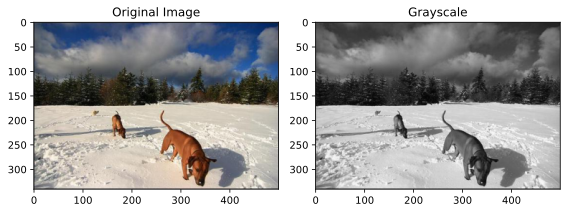

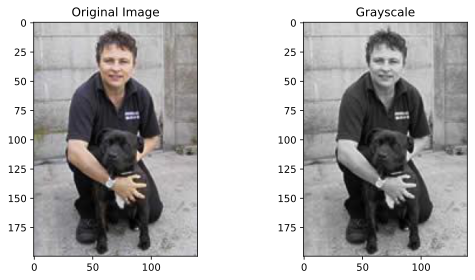

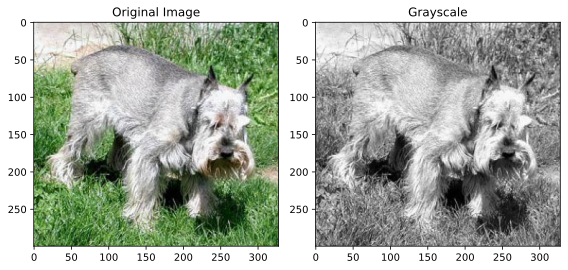

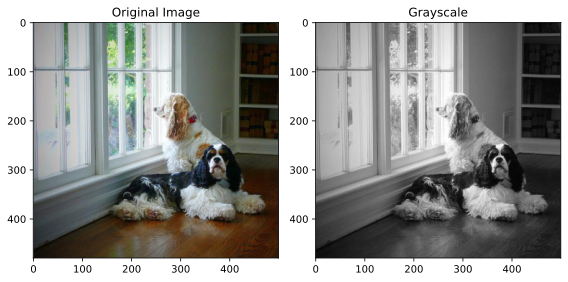

In [222]:
# 1) Rhodesian_ridgeback

# Load the image from the file path
img_path1 = "/Users/angel/Data_Mining/Images/n02087394-Rhodesian_ridgeback/n02087394_101.jpg"
image1 = io.imread(img_path1)
grayscale = rgb2gray(image1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

# Show grayscale image
ax[0].imshow(image1)
ax[0].set_title("Original Image")
ax[0].axis('on')

# Show original image
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
ax[1].axis('on')

# Adjust layout and display
fig.tight_layout()
plt.show()



# 2) Staffordshire
# Load the image from the file path
img_path2 = '/Users/angel/Data_Mining/Images/n02093256-Staffordshire_bullterrier/n02093256_225.jpg'
image2 = io.imread(img_path2)
grayscale = rgb2gray(image2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

# Show grayscale image
ax[0].imshow(image2)
ax[0].set_title("Original Image")
ax[0].axis('on')

# Show original image
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
ax[1].axis('on')

# Adjust layout and display
fig.tight_layout()
plt.show()


# 3) Standard
# Load the image from the file path
img_path3 = '/Users/angel/Data_Mining/Images/n02097209-standard_schnauzer/n02097209_1.jpg'
image3 = io.imread(img_path3)
grayscale = rgb2gray(image3)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

# Show grayscale image
ax[0].imshow(image3)
ax[0].set_title("Original Image")
ax[0].axis('on')

# Show original image
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
ax[1].axis('on')

# Adjust layout and display
fig.tight_layout()
plt.show()

#4 cocker  
# Load the image from the file path
img_path4 = '/Users/angel/Data_Mining/Images/n02102318-cocker_spaniel/n02102318_20.jpg'
image4 = io.imread(img_path4)
grayscale = rgb2gray(image4)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

# Show grayscale image
ax[0].imshow(image4)
ax[0].set_title("Original Image")
ax[0].axis('on')

# Show original image
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
ax[1].axis('on')

# Adjust layout and display
fig.tight_layout()
plt.show()


In [224]:
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)
    angle_sobel = angle(filters.sobel_h(I),
    filters.sobel_v(I))

In [226]:
#1
image1 = img_as_float(image1)
np.histogram(image1, bins=2)
exposure.histogram(image1, nbins=36)


/opt/anaconda3/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


(array([ 8963,  9383, 11491, 13184, 12776, 11314, 10573, 10747, 11307,
        11284, 11708, 11527, 14062, 15527, 17398, 18367, 19520, 18144,
        18459, 17693, 13207,  9056,  7130,  6482,  8977, 14077, 24618,
        26125, 27806, 30557, 25953, 18252, 10807,  6725,  4394,  3907]),
 array([0.01388889, 0.04166667, 0.06944444, 0.09722222, 0.125     ,
        0.15277778, 0.18055556, 0.20833333, 0.23611111, 0.26388889,
        0.29166667, 0.31944444, 0.34722222, 0.375     , 0.40277778,
        0.43055556, 0.45833333, 0.48611111, 0.51388889, 0.54166667,
        0.56944444, 0.59722222, 0.625     , 0.65277778, 0.68055556,
        0.70833333, 0.73611111, 0.76388889, 0.79166667, 0.81944444,
        0.84722222, 0.875     , 0.90277778, 0.93055556, 0.95833333,
        0.98611111]))

In [228]:
# 2
image2 = img_as_float(image2)
np.histogram(image2, bins=2)
exposure.histogram(image2, nbins=36)

(array([ 775, 1940, 1978, 2090, 2207, 2546, 2703, 2475, 2127, 1761, 1435,
        1114, 1084,  864,  909, 1031, 1242, 1744, 2560, 3361, 3876, 3806,
        4471, 4655, 5505, 5673, 6706, 6474, 4307, 1594,  378,  256,  199,
          93,   40,   21]),
 array([0.01388889, 0.04166667, 0.06944444, 0.09722222, 0.125     ,
        0.15277778, 0.18055556, 0.20833333, 0.23611111, 0.26388889,
        0.29166667, 0.31944444, 0.34722222, 0.375     , 0.40277778,
        0.43055556, 0.45833333, 0.48611111, 0.51388889, 0.54166667,
        0.56944444, 0.59722222, 0.625     , 0.65277778, 0.68055556,
        0.70833333, 0.73611111, 0.76388889, 0.79166667, 0.81944444,
        0.84722222, 0.875     , 0.90277778, 0.93055556, 0.95833333,
        0.98611111]))

In [230]:
# 3
image3 = img_as_float(image3)
np.histogram(image3, bins=2)
exposure.histogram(image3, nbins=36)

(array([ 6962,  3255,  3552,  3765,  4408,  5264,  5657,  6250,  6983,
         7266,  7975,  8446, 10106,  9314,  9534,  9645,  9945, 10114,
        10155, 10087, 10015,  9933,  9560,  9633, 10998,  9726,  9635,
         9720, 10268, 10482, 10480,  9578,  8239,  7370,  6185,  4695]),
 array([0.01388889, 0.04166667, 0.06944444, 0.09722222, 0.125     ,
        0.15277778, 0.18055556, 0.20833333, 0.23611111, 0.26388889,
        0.29166667, 0.31944444, 0.34722222, 0.375     , 0.40277778,
        0.43055556, 0.45833333, 0.48611111, 0.51388889, 0.54166667,
        0.56944444, 0.59722222, 0.625     , 0.65277778, 0.68055556,
        0.70833333, 0.73611111, 0.76388889, 0.79166667, 0.81944444,
        0.84722222, 0.875     , 0.90277778, 0.93055556, 0.95833333,
        0.98611111]))

In [232]:
# 4
image4 = img_as_float(image4)
np.histogram(image4, bins=2)
exposure.histogram(image4, nbins=36)

(array([27957, 25059, 26858, 25757, 20035, 19843, 18387, 18295, 18786,
        20825, 23770, 28061, 36135, 31274, 28725, 22104, 19242, 18102,
        16966, 18170, 16732, 15663, 17026, 19334, 25671, 23404, 20407,
        18576, 18978, 17263, 14245, 11564,  9818,  9002,  8134,  9832]),
 array([0.01388889, 0.04166667, 0.06944444, 0.09722222, 0.125     ,
        0.15277778, 0.18055556, 0.20833333, 0.23611111, 0.26388889,
        0.29166667, 0.31944444, 0.34722222, 0.375     , 0.40277778,
        0.43055556, 0.45833333, 0.48611111, 0.51388889, 0.54166667,
        0.56944444, 0.59722222, 0.625     , 0.65277778, 0.68055556,
        0.70833333, 0.73611111, 0.76388889, 0.79166667, 0.81944444,
        0.84722222, 0.875     , 0.90277778, 0.93055556, 0.95833333,
        0.98611111]))

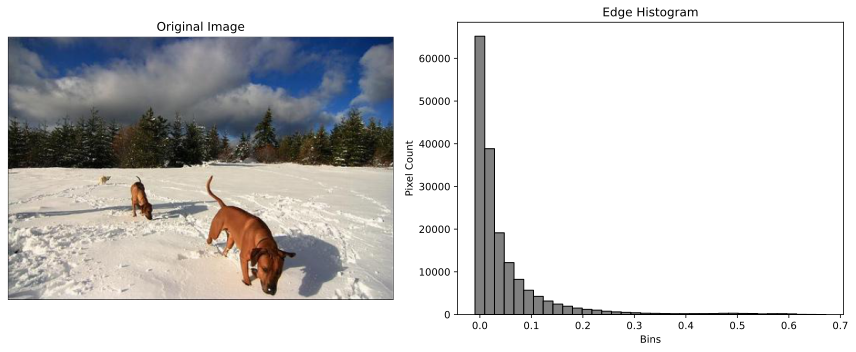

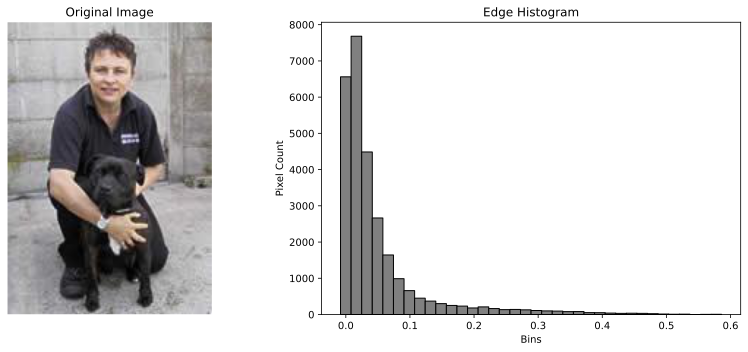

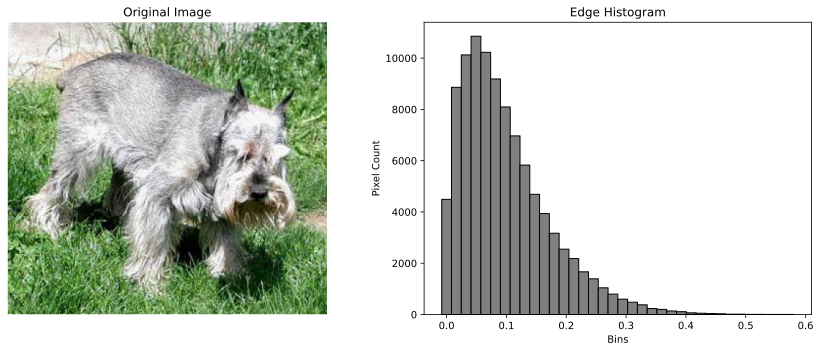

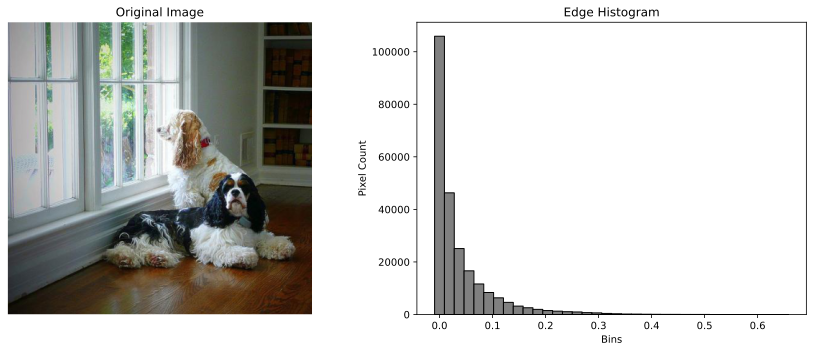

In [234]:

#1
edges = sobel(image1[:, :, 0]) 
hist1, bins = np.histogram(edges, bins=36)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off axis
axes[0].set_title("Original Image")
axes[1].bar(bins[:-1], hist1, width=np.diff(bins), color='gray', edgecolor='black')
axes[1].set_title("Edge Histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Pixel Count")

plt.tight_layout()
plt.show()

#2 
edges = sobel(image2[:, :, 0]) 
hist2, bins = np.histogram(edges, bins=36)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image2)
axes[0].axis('off')  # Turn off axis
axes[0].set_title("Original Image")
axes[1].bar(bins[:-1], hist2, width=np.diff(bins), color='gray', edgecolor='black')
axes[1].set_title("Edge Histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Pixel Count")

plt.tight_layout()
plt.show()

#3
edges = sobel(image3[:, :, 0]) 
hist, bins = np.histogram(edges, bins=36)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image3)
axes[0].axis('off')  # Turn off axis
axes[0].set_title("Original Image")
axes[1].bar(bins[:-1], hist, width=np.diff(bins), color='gray', edgecolor='black')
axes[1].set_title("Edge Histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Pixel Count")

plt.tight_layout()
plt.show()

#4
edges = sobel(image4[:, :, 0]) 
hist, bins = np.histogram(edges, bins=36)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image4)
axes[0].axis('off')  # Turn off axis
axes[0].set_title("Original Image")
axes[1].bar(bins[:-1], hist, width=np.diff(bins), color='gray', edgecolor='black')
axes[1].set_title("Edge Histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Pixel Count")

plt.tight_layout()
plt.show()

In [236]:
import numpy as np
from sklearn.metrics import pairwise

euclidean_distance = pairwise.euclidean_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]
print(f"Euclidean Distance: {euclidean_distance}")

manhattan_distance = pairwise.manhattan_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]
print(f"Manhattan Distance: {manhattan_distance}")

cosine_distance = pairwise.cosine_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]
print(f"Cosine Distance: {cosine_distance}")


Euclidean Distance: 69352.09608944779
Manhattan Distance: 142504.0
Cosine Distance: 0.061688196223589675


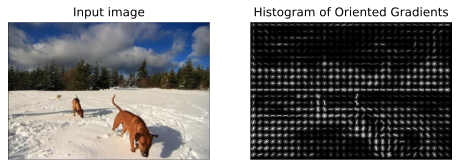

In [238]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


img_path1 = "/Users/angel/Data_Mining/Images/n02087394-Rhodesian_ridgeback/n02087394_101.jpg"
image = io.imread(img_path1)

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

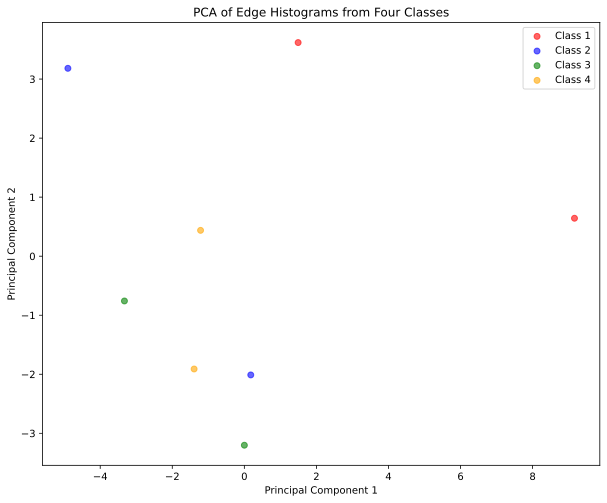

In [240]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure
from skimage.filters import sobel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load Images from Four Classes
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        # Ensure the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, filename)
            try:
                img = io.imread(img_path)
                if img is not None:
                    images.append(img)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return images

# Define folders for the four classes
folders = [
    '/Users/angel/Data_Mining/Images/n02087394-Rhodesian_ridgeback/',
    '/Users/angel/Data_Mining/Images/n02093256-Staffordshire_bullterrier/',
    '/Users/angel/Data_Mining/Images/n02097209-standard_schnauzer/',
    '/Users/angel/Data_Mining/Images/n02102318-cocker_spaniel/'
]

# Load all images from the four classes
all_images = []
for folder in folders:
    images = load_images_from_folder(folder)
    all_images.append(images)

# Step 2: Convert Images to Edge Histograms
def compute_edge_histogram(image, bins=36):
    # Convert to grayscale
    gray_image = color.rgb2gray(image)
    # Apply edge detection (Sobel)
    edges = sobel(gray_image)
    # Compute histogram of edge intensities
    hist, _ = np.histogram(edges, bins=bins, range=(0, 1))
    return hist

# Compute histograms for all images
edge_histograms = []
for images in all_images:
    for img in images:
        hist = compute_edge_histogram(img)
        edge_histograms.append(hist)

# Convert to numpy array
edge_histograms = np.array(edge_histograms)

# Step 3: Perform PCA on the Histograms
# Standardize the data before PCA
scaler = StandardScaler()
edge_histograms_scaled = scaler.fit_transform(edge_histograms)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(edge_histograms_scaled)

# Step 4: Plot the 2D Points with Different Colors for the Four Classes
# Assign colors to each class
colors = ['red', 'blue', 'green', 'orange']

# Create labels for each class (for coloring)
labels = []
for i, images in enumerate(all_images):
    labels += [i] * len(images)

# Convert labels to numpy array for easier handling
labels = np.array(labels)

# Plot PCA results
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], c=color, label=f'Class {i+1}', alpha=0.6)

plt.title('PCA of Edge Histograms from Four Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [242]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    "And all the bullshit in your live ends and nothing will bother you ever again.",
    "@COFFEECOWal Really Sad News, it's been a pleasure over the years, all the best for the future.",
    "It's #NationalFrenchFryDay and I'm working at McDonald's.",
    "And the angel said unto them, Fear not: for, behold, I bring you good tidings of great joy, which shall be to all people",
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())



['again' 'all' 'and' 'angel' 'at' 'be' 'been' 'behold' 'best' 'bother'
 'bring' 'bullshit' 'coffeecowal' 'ends' 'ever' 'fear' 'for' 'future'
 'good' 'great' 'in' 'it' 'joy' 'live' 'mcdonald' 'nationalfrenchfryday'
 'news' 'not' 'nothing' 'of' 'over' 'people' 'pleasure' 'really' 'sad'
 'said' 'shall' 'the' 'them' 'tidings' 'to' 'unto' 'which' 'will'
 'working' 'years' 'you' 'your']


In [244]:
print(X.toarray())
print(X.shape)

[[1 1 2 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 1 0 0 1 1]
 [0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0
  0 3 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1
  1 1 1 1 1 1 1 0 0 0 1 0]]
(4, 48)


In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    "And all the bullshit in your live ends and nothing will bother you ever again.",
    "@COFFEECOWal Really Sad News, it's been a pleasure over the years, all the best for the future.",
    "It's #NationalFrenchFryDay and I'm working at McDonald's.",
    "And the angel said unto them, Fear not: for, behold, I bring you good tidings of great joy, which shall be to all people",

]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['again' 'all' 'and' 'angel' 'at' 'be' 'been' 'behold' 'best' 'bother'
 'bring' 'bullshit' 'coffeecowal' 'ends' 'ever' 'fear' 'for' 'future'
 'good' 'great' 'in' 'it' 'joy' 'live' 'mcdonald' 'nationalfrenchfryday'
 'news' 'not' 'nothing' 'of' 'over' 'people' 'pleasure' 'really' 'sad'
 'said' 'shall' 'the' 'them' 'tidings' 'to' 'unto' 'which' 'will'
 'working' 'years' 'you' 'your']


In [248]:
print(X.shape)

(4, 48)


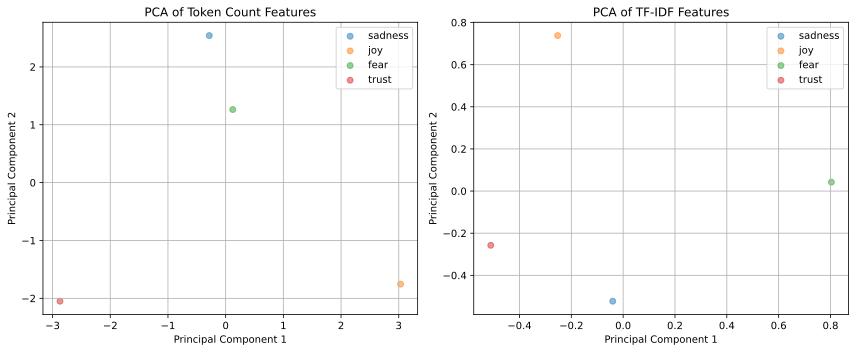

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Step 1: Simulate processed text data
# Let's say we have the following classes (for example):
classes = ['sadness', 'joy', 'fear', 'trust']

# Simulated documents belonging to each class
documents = {
    'sadness': ["And all the bullshit in your live ends and nothing will bother you ever again."],
    'joy': ["@COFFEECOWal Really Sad News, it's been a pleasure over the years, all the best for the future."],
    'fear': ["It's #NationalFrenchFryDay and I'm working at McDonald's."],
    'trust': ["And the angel said unto them, Fear not: for, behold, I bring you good tidings of great joy, which shall be to all people"]
}

# Flatten the document list and create corresponding labels
text_data = []
labels = []
for class_label in classes:
    text_data.extend(documents[class_label])
    labels.extend([class_label] * len(documents[class_label]))

# Step 2: Create token count features
count_vectorizer = CountVectorizer()
token_count_features = count_vectorizer.fit_transform(text_data).toarray()

# Step 3: Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(text_data).toarray()


pca_count = PCA(n_components=2)
pca_result_count = pca_count.fit_transform(token_count_features)

# Step 5: Perform PCA for TF-IDF Features
pca_tfidf = PCA(n_components=2)
pca_result_tfidf = pca_tfidf.fit_transform(tfidf_features)

# Step 6: Plot the PCA results for Token Count Features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, class_label in enumerate(classes):
    plt.scatter(pca_result_count[np.array(labels) == class_label, 0], 
                pca_result_count[np.array(labels) == class_label, 1],
                label=class_label, alpha=0.5)

plt.title('PCA of Token Count Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

# Step 7: Plot the PCA results for TF-IDF Features
plt.subplot(1, 2, 2)
for i, class_label in enumerate(classes):
    plt.scatter(pca_result_tfidf[np.array(labels) == class_label, 0], 
                pca_result_tfidf[np.array(labels) == class_label, 1],
                label=class_label, alpha=0.5)

plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()